In [1]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
 


# Importing required packages and libraries
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

import math
from sklearn.utils import resample

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from  sklearn.decomposition  import  PCA
from sklearn import svm

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import scale
 
from  sklearn.model_selection  import  GridSearchCV

import matplotlib.image as mpimg
import random
import os,sys
from scipy import stats
 
from skimage.color import rgb2gray

import re
from keras_preprocessing.image import ImageDataGenerator

import tifffile as tiff
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt
plt.style.use('default')

from glob import glob

# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
 
from sklearn.svm import SVC
 
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
 
from sklearn.model_selection import train_test_split
# from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_curve

import warnings
warnings.simplefilter("ignore", category=DeprecationWarning)

import os
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from  keras.wrappers.scikit_learn  import  KerasClassifier
from  sklearn.model_selection  import  GridSearchCV
from keras.utils import np_utils
from PIL import Image
 
import time


In [2]:

# Set the path to the directory containing the tif images
img_dir = ("C:\\Users\\mseme\\OneDrive\\Documents\\CS5661 Topics in Adv Data Science\\FinalProject_Histopathologic_Cancer_Detection\\Files\\Image")

# Set the path to the CSV file containing the id-label mapping
# result = pd.read_csv("C:/Users/mseme\OneDrive\Documents\CS5661 Topics in Adv Data Science\FinalProject_Histopathologic_Cancer_Detection\Files\BalancedDataCompressedAutoEncoderPlusPCA.csv", index_col=0) 
result = pd.read_csv('BalancedDataCompressedAutoEncoderPlusPCA.csv', index_col=0)

label = result['label']

label
# Load the id-label mapping file into a DataFrame
# id_df = pd.read_csv(id_file,index_col=0)

# id_df
# id_file

# id_file['label'].value_counts()
 

0        1
1        1
2        1
3        0
4        1
        ..
19995    1
19996    1
19997    0
19998    0
19999    1
Name: label, Length: 20000, dtype: int64

In [3]:
label.head()

0    1
1    1
2    1
3    0
4    1
Name: label, dtype: int64

In [4]:
label.describe()

count    20000.000000
mean         0.500000
std          0.500013
min          0.000000
25%          0.000000
50%          0.500000
75%          1.000000
max          1.000000
Name: label, dtype: float64

In [5]:
result

,file name,label,0,1,2,3,4,5,6,7,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
0,fe520665f21f76336f312f8f68bcd4831c057dd5,1,0.177551,-9.586820,-8.566801,-2.741533,4.088705,-2.601283,-2.538927,0.708467,...,-0.081534,-0.002311,-0.057945,0.017998,0.130523,-0.149506,0.013944,-0.100151,0.081980,0.089024
1,7cf8a043a6185d130ac7b3ac29131ef56a0a1dea,1,-2.219753,-8.986357,-7.431108,0.039660,3.985695,-1.272582,1.870875,1.217411,...,0.104494,-0.241981,0.085478,-0.134899,-0.016479,0.083136,-0.155667,-0.050047,0.081754,-0.144524
2,b1bbbb20cf222ebc90058e3b28c1b57d460375a3,1,-7.285353,-4.389901,-2.301738,3.631255,-5.471744,-3.653268,0.952643,-0.615656,...,0.048240,-0.052129,0.172595,-0.095746,0.076016,0.112851,-0.026718,0.071247,-0.051166,0.142570
3,eda2fdea00f4d45ffeab69bef3905bd00439c3f9,0,7.198379,8.367715,-1.824436,0.058183,-0.578592,3.013971,4.789231,1.722777,...,0.130234,-0.018426,0.001495,0.043898,0.018813,-0.057775,0.011729,0.051898,-0.030612,0.071710
4,d7786b09f5fc66182046e4742667a7529a8fa71b,1,-8.866398,15.523893,2.956651,1.666184,-1.177167,-1.440076,6.350306,1.654882,...,-0.057908,0.072258,0.060307,-0.121543,0.086209,0.025314,0.078836,0.083207,-0.023780,0.093864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,ad24cc8089e87731ec6d963dee09e0b697441866,1,-2.386042,15.283563,-0.677916,1.990766,0.924039,3.198889,3.348169,-0.447658,...,0.088011,0.023495,0.037156,-0.036155,0.000122,-0.025709,0.041122,-0.051271,0.058958,0.058770
19996,6a0f67b9058a94ebd4b03662b1817cc39476b4a7,1,0.013430,-1.198561,-3.107152,4.725783,-0.544180,0.520402,1.201299,-0.671730,...,0.035696,0.049471,0.030775,-0.213990,-0.213677,0.187356,0.117131,0.034502,-0.046804,0.120294
19997,5e11ba7e44f309f02f26ec4fd430330f40f16bc2,0,-13.904292,-14.768571,-4.799007,-3.501939,-0.518888,0.456912,-1.825171,-0.374967,...,-0.025817,0.043884,0.053620,0.080060,0.119396,0.185163,-0.049184,0.206338,-0.162770,-0.105561
19998,2b4de74b8920bdc174e9330a916f9903c4001b43,0,22.093441,-0.437056,2.179865,-2.586366,1.197968,-0.401659,1.514603,-4.124180,...,0.007796,0.007779,-0.083116,-0.095148,0.079233,0.035925,0.044013,0.005759,0.001792,-0.166266


In [6]:
result.head()

,file name,label,0,1,2,3,4,5,6,7,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
0,fe520665f21f76336f312f8f68bcd4831c057dd5,1,0.177551,-9.586820,-8.566801,-2.741533,4.088705,-2.601283,-2.538927,0.708467,...,-0.081534,-0.002311,-0.057945,0.017998,0.130523,-0.149506,0.013944,-0.100151,0.081980,0.089024
1,7cf8a043a6185d130ac7b3ac29131ef56a0a1dea,1,-2.219753,-8.986357,-7.431108,0.039660,3.985695,-1.272582,1.870875,1.217411,...,0.104494,-0.241981,0.085478,-0.134899,-0.016479,0.083136,-0.155667,-0.050047,0.081754,-0.144524
2,b1bbbb20cf222ebc90058e3b28c1b57d460375a3,1,-7.285353,-4.389901,-2.301738,3.631255,-5.471744,-3.653268,0.952643,-0.615656,...,0.048240,-0.052129,0.172595,-0.095746,0.076016,0.112851,-0.026718,0.071247,-0.051166,0.142570
3,eda2fdea00f4d45ffeab69bef3905bd00439c3f9,0,7.198379,8.367715,-1.824436,0.058183,-0.578592,3.013971,4.789231,1.722777,...,0.130234,-0.018426,0.001495,0.043898,0.018813,-0.057775,0.011729,0.051898,-0.030612,0.071710
4,d7786b09f5fc66182046e4742667a7529a8fa71b,1,-8.866398,15.523893,2.956651,1.666184,-1.177167,-1.440076,6.350306,1.654882,...,-0.057908,0.072258,0.060307,-0.121543,0.086209,0.025314,0.078836,0.083207,-0.023780,0.093864


In [7]:
result.describe()

,label,0,1,2,3,4,5,6,7,8,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
count,20000.000000,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,0.500000,2.088126e-07,-9.166484e-08,-1.363365e-08,1.949323e-08,-3.865410e-08,2.421482e-07,-1.282729e-07,7.775408e-08,-2.262162e-08,...,3.995237e-08,9.920124e-08,-1.547733e-08,1.968654e-08,-2.427242e-09,3.186554e-08,8.509374e-08,1.281236e-08,-8.182578e-08,-5.632186e-08
std,0.500013,1.474024e+01,9.102001e+00,5.039059e+00,3.733585e+00,3.213848e+00,3.195338e+00,2.347137e+00,2.018530e+00,1.987067e+00,...,8.096455e-02,8.086915e-02,8.073678e-02,8.065372e-02,8.053316e-02,8.033270e-02,8.015819e-02,8.008096e-02,7.997957e-02,7.981441e-02
min,0.000000,-4.596950e+01,-2.253896e+01,-1.104017e+01,-1.494886e+01,-2.340400e+01,-2.584538e+01,-1.305435e+01,-1.582628e+01,-1.433706e+01,...,-3.260214e-01,-3.446910e-01,-3.356873e-01,-3.587885e-01,-3.469533e-01,-3.396295e-01,-3.539658e-01,-3.557822e-01,-3.502170e-01,-3.119349e-01
25%,0.000000,-1.109097e+01,-7.444768e+00,-3.316816e+00,-2.250826e+00,-1.211048e+00,-1.264179e+00,-1.370580e+00,-8.672520e-01,-8.947568e-01,...,-5.151960e-02,-5.123389e-02,-5.133718e-02,-5.177023e-02,-5.048248e-02,-5.090635e-02,-5.094431e-02,-5.136374e-02,-5.082025e-02,-5.152954e-02
50%,0.500000,-2.002943e+00,-1.044415e+00,-9.810855e-01,-1.578701e-01,1.877456e-02,-4.557872e-02,8.391320e-02,2.989235e-02,-3.360247e-02,...,-4.782086e-04,5.375167e-05,-1.433565e-04,1.871385e-04,2.811646e-04,-5.335054e-04,4.918452e-06,5.419119e-04,-2.469770e-04,-6.682177e-04
75%,1.000000,9.258100e+00,7.796474e+00,2.659549e+00,2.177795e+00,1.232336e+00,1.149010e+00,1.425016e+00,8.909989e-01,8.343419e-01,...,5.171099e-02,5.130615e-02,5.128162e-02,5.162291e-02,5.086908e-02,5.076226e-02,5.085868e-02,5.055725e-02,4.971059e-02,5.082354e-02
max,1.000000,4.747200e+01,2.279270e+01,5.523403e+01,1.752578e+01,2.500739e+01,2.595269e+01,1.506131e+01,1.606234e+01,1.883499e+01,...,3.556041e-01,3.802525e-01,3.685075e-01,3.648540e-01,4.047183e-01,4.578056e-01,4.466569e-01,3.734620e-01,3.989320e-01,3.654689e-01


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split((result[result.columns[2:]]), label, test_size=0.3, random_state=1)

In [10]:
print(X_train)

               0          1         2          3         4         5  \
11408  -2.248636  -9.143990 -7.781368  -1.733500 -0.840036 -0.098615   
3616   -8.405453  12.071984 -1.743248  -3.189389 -1.163217  0.895615   
9747   21.492823   3.005786  3.347923  -1.100967 -1.638999  4.087186   
6915  -12.314317  -3.291711  0.536032   5.664044  3.613076  2.868855   
4888   -3.691460   9.611960 -2.253286  -1.473136 -0.828848  0.198434   
...          ...        ...       ...        ...       ...       ...   
10955   1.250090   6.814649 -0.973645  11.783412 -0.390814  0.898112   
17289 -14.840370   0.456261  4.888221   9.242828 -1.943980 -2.678756   
5192   -3.879322   1.898334 -2.188115   5.584607  2.923353  2.372623   
12172  -2.521931   0.534134 -2.666053   5.133602 -2.017707 -6.379038   
235     7.683032  10.980227 -1.188711   0.604425  2.099032  2.426074   

              6         7         8         9  ...      2105      2106  \
11408 -1.097777 -0.100142 -0.012249 -0.151186  ... -0.061065 

In [11]:
print(X_test)

               0          1          2         3         4         5  \
11456  -5.786971  15.892533  -0.990600  0.177045 -1.172815  1.928713   
16528 -15.800930 -12.090265  -0.897042 -0.139967 -1.990583 -4.482400   
3253   21.760777  -1.699984   3.787650  1.380079 -5.518615  1.712931   
18614  -9.435073  -3.035465  -3.264546  4.533225  0.880271 -1.044563   
1544    3.476434  10.189993  -3.258479 -1.772435  0.122395  0.232063   
...          ...        ...        ...       ...       ...       ...   
12696   8.022386  -4.826607  -2.647975  1.400437 -6.806574  3.003703   
14288  -0.626596   0.486542  -3.666177  5.307048 -0.378192 -0.583206   
18768 -21.056020   4.791933   9.517598 -5.331087  1.071535 -2.912932   
3950  -13.447669 -10.114277  -4.235023 -1.196568 -0.561449 -1.816325   
8871   38.799770  -5.864591  11.868583 -1.157948  0.524142 -0.593029   

              6         7         8         9  ...      2105      2106  \
11456 -0.535719 -0.794647 -0.070952  0.627668  ...  0.035518 

In [12]:
print(y_train)

11408    1
3616     1
9747     1
6915     1
4888     1
        ..
10955    1
17289    1
5192     1
12172    1
235      1
Name: label, Length: 14000, dtype: int64


In [13]:
print(y_test)

11456    1
16528    1
3253     0
18614    1
1544     1
        ..
12696    1
14288    1
18768    0
3950     1
8871     0
Name: label, Length: 6000, dtype: int64


In [14]:
# results to be able too print and compare them later

printResults = []

# Logistic Regression

In [15]:
# instantiating a LogisticRegression object
logReg = LogisticRegression(max_iter = 10000)

# fitting
logReg.fit(X_train, y_train)

# predicting
y_predict = logReg.predict(X_test)

# calculating accuracy
score = accuracy_score(y_test, y_predict)
print(score)

0.748


In [16]:
# estimating the probability of each label
y_prob = logReg.predict_proba(X_test)

# Prints "actual label" of the testing set
print(y_test)

# Prints "predicted label" for the testing set:
print(y_predict)

# Prints "estimated likelihood of both label" for the testing set:
print(y_prob)

# Pints the "estimated likelihood of label=1" for the testing set:
print(y_prob[:,1])


11456    1
16528    1
3253     0
18614    1
1544     1
        ..
12696    1
14288    1
18768    0
3950     1
8871     0
Name: label, Length: 6000, dtype: int64
[1 0 0 ... 1 0 0]
[[0.07520677 0.92479323]
 [0.75960162 0.24039838]
 [0.64688873 0.35311127]
 ...
 [0.02435066 0.97564934]
 [0.97890163 0.02109837]
 [0.98862548 0.01137452]]
[0.92479323 0.24039838 0.35311127 ... 0.97564934 0.02109837 0.01137452]


In [17]:
# True positive rate and False positive rate
fpr_logisticReg, tpr_logisticReg, thresholds = metrics.roc_curve(y_test, y_prob[:,1], pos_label=1)


In [18]:
print(fpr_logisticReg)


[0.00000000e+00 3.31564987e-04 3.31564987e-04 ... 9.98673740e-01
 9.98673740e-01 1.00000000e+00]


In [19]:
print(tpr_logisticReg)

[0.         0.         0.0016756  ... 0.99966488 1.         1.        ]


In [20]:
# AUC:
AUC_logisticReg = metrics.auc(fpr_logisticReg, tpr_logisticReg)
print("AUC:" + str(AUC_logisticReg))

AUC:0.814373386620775


In [21]:
 
print("Logistic Regression Accuracy: " + str(score))
print("AUC Accuracy: " + str(AUC_logisticReg))



Logistic Regression Accuracy: 0.748
AUC Accuracy: 0.814373386620775


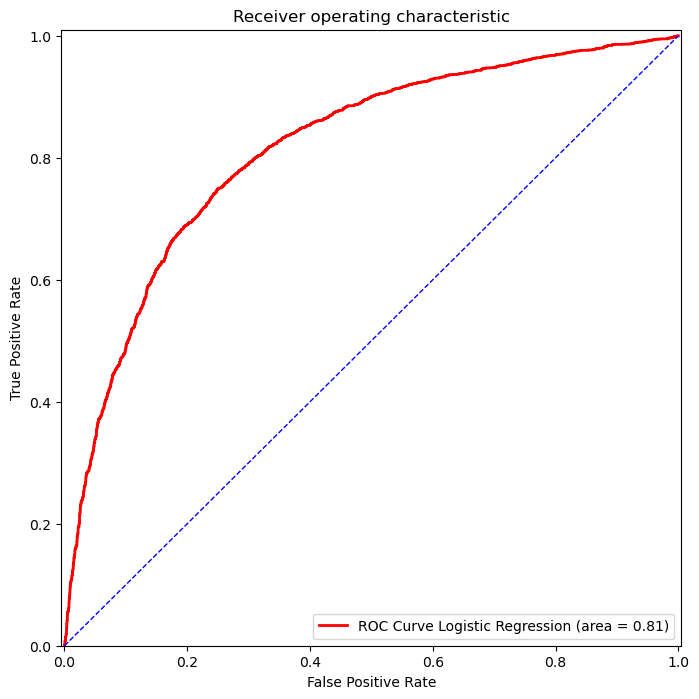

In [22]:
 
%matplotlib inline

plt.figure(figsize=(8,8))
# plt.figure()

# Roc Curve:
plt.plot(fpr_logisticReg, tpr_logisticReg, color='red', lw=2, label='ROC Curve Logistic Regression (area = %0.2f)' % AUC_logisticReg)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()


# ADA Boost

In [ ]:
my_AdaBoost = AdaBoostClassifier(n_estimators = 29,random_state=2)

# fitting and training the dataset
my_AdaBoost.fit(X_train, y_train)

# predicting the labels
adaBoostPredict = my_AdaBoost.predict(X_test)

# calculating the accuracy
score = accuracy_score(y_test, adaBoostPredict)
print("Accuracy Score: " + str(score))

In [ ]:
# estimating the probability 
y_predict_prob = my_AdaBoost.predict_proba(X_test)

# calculating false and true positive rate 
fpr_adaBoost, tpr_adaBoost, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)


In [ ]:
print(fpr_adaBoost)


In [ ]:
print(tpr_adaBoost)

In [ ]:
# AUC
AUC_adaBoost = metrics.auc(fpr_adaBoost, tpr_adaBoost)
print("AUC: " + str(AUC_adaBoost))

In [ ]:
print("ADAboost Accuracy: " + str(score))
print("AUC Accuracy: " + str(AUC_adaBoost))

In [ ]:
 
%matplotlib inline

plt.figure(figsize=(8,8))
# plt.figure()

# Roc Curve:
plt.plot(fpr_logisticReg, tpr_logisticReg, color='green', lw=2, label='ROC Curve Logistic Regression (area = %0.2f)' % AUC_logisticReg)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()



# K-Neighbors Classifier

In [ ]:
# Instantiating a KNN object with K=3
knn = KNeighborsClassifier(n_neighbors=3)

# We are training on the training set only
# function 'fit' will train the model using X (features from dataframe) and y (labels from dataframe)
knn.fit(X_train, y_train)

# Testing on the testing set
y_predict = knn.predict(X_test)

In [ ]:
print("Predicted Labels:\n")
print(y_predict)


In [ ]:
score = accuracy_score(y_test, y_predict)
print("Accuracy Score: " + str(score) + "\n")

In [ ]:
y_prob = knn.predict_proba(X_test)
# True positive rate and False positive rate
fpr_knn, tpr_knn, thresholds = metrics.roc_curve(y_test, y_prob[:,1], pos_label=1)

In [ ]:
print(fpr_knn)

In [ ]:
print(tpr_knn)


In [ ]:
# AUC:
AUC_knn = metrics.auc(fpr_knn, tpr_knn)

In [ ]:
print("KNN n=3: Accuracy: " + str(score))
print("AUC: " + str(AUC_knn))

In [ ]:

 
%matplotlib inline

plt.figure(figsize=(8,8))
plt.plot(fpr_knn, tpr_knn, color='orange', lw=2, label='ROC Curve KNN n = 3 (area = %0.2f)' % AUC_knn)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()



# ANN

In [ ]:
# Set the path to the directory containing the tif images
img_dir = ("C:\\Users\\mseme\\OneDrive\\Documents\\CS5661 Topics in Adv Data Science\\FinalProject_Histopathologic_Cancer_Detection\\Files\\Image")

# Set the path to the CSV file containing the id-label mapping
# result = pd.read_csv("C:/Users/mseme\OneDrive\Documents\CS5661 Topics in Adv Data Science\FinalProject_Histopathologic_Cancer_Detection\Files\BalancedDataCompressedAutoEncoderPlusPCA.csv", index_col=0) 
result = pd.read_csv('BalancedDataCompressedAutoEncoderPlusPCA.csv', index_col=0)

label = result['label']

label

In [ ]:
X_train, X_test, y_train, y_test = train_test_split((result[result.columns[2:]]), label, test_size=0.3, random_state=1)

In [ ]:
# 1 Hidden Layer with 100 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(100,), activation= 'logistic', 
                       solver='adam', alpha=1, random_state=1, 
                       learning_rate_init = 0.2, verbose=True)

In [ ]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)

In [ ]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

In [ ]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

In [ ]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

In [ ]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.

# 2 Hidden Layers, first one with 6 neurons, second with 4 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(6,4), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)

In [ ]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

In [ ]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

In [ ]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

In [ ]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

In [ ]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Confusion Matrix

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Set the path to the directory containing the tif images
img_dir = ("C:\\Users\\mseme\\OneDrive\\Documents\\CS5661 Topics in Adv Data Science\\FinalProject_Histopathologic_Cancer_Detection\\Files\\Image")

# Set the path to the CSV file containing the id-label mapping
# result = pd.read_csv("C:/Users/mseme\OneDrive\Documents\CS5661 Topics in Adv Data Science\FinalProject_Histopathologic_Cancer_Detection\Files\BalancedDataCompressedAutoEncoderPlusPCA.csv", index_col=0) 
result = pd.read_csv('BalancedDataCompressedAutoEncoderPlusPCA.csv', index_col=0)

label = result['label']

label


In [ ]:
result, label = make_classification(random_state=0)

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(result, label, random_state=0)

In [ ]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)

In [ ]:
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

In [ ]:
disp.plot()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
 


X_train, X_test, y_train, y_test = train_test_split(result, label, random_state=0)

In [ ]:
clf = SVC(random_state=0)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)


In [ ]:
disp.plot()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

# Test #2 with images

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

import matplotlib.image as mpimg
import os
from skimage.color import rgb2gray

In [ ]:

# Load the image
img = mpimg.imread('image.tiff')

# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [ ]:
# Set the path to the directory containing the tif images
img_dir = ("C:\\Users\\mseme\\OneDrive\\Documents\\CS5661 Topics in Adv Data Science\\FinalProject_Histopathologic_Cancer_Detection\\Files\\Image")

# Set the path to the CSV file containing the id-label mapping
# result = pd.read_csv("C:/Users/mseme\OneDrive\Documents\CS5661 Topics in Adv Data Science\FinalProject_Histopathologic_Cancer_Detection\Files\BalancedDataCompressedAutoEncoderPlusPCA.csv", index_col=0) 
id_file = pd.read_csv('BalancedDataCompressedAutoEncoderPlusPCA.csv', index_col=0)

id_file

In [ ]:
# Print the image dimensions
print('Original image shape: {}'.format(img.shape))

# Turning the image into grayscale format  
img_gray = rgb2gray(img)
print('New image shape: {}'.format(img_gray.shape))

In [ ]:
# Now, let's plot the data

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')

plt.tight_layout()
plt.show()